# Narendra Modi vs Rahul Gandhi Recognizer
Structure your datasets into a directory structure like this,<br>
replace the class_A and class_B names with whatever you want to show your CNN model as the y-label

dataset
    - training_set
            - class_A
            - class_B
    - test_set
            - class_A
            - class_B

**Importing libraries**

In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPool2D,Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.
/Users/learning/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/learning/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/learning/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/learning/anaconda3/lib/python3.7/site-pa

**buildng the CNN**

In [4]:
classifier=Sequential()
# convolution layer - 32 feature detectors of 3x3 shape plus a rectifier on top of our convolved feature map
# 32,(3,3) means 32 filters means matrix of 3*3 we do at convolution
# input_shape helps to take all images in a common dimesnion though they are differnet shapes (1028*23) 0r (723*512) 
# as we have RGB values to color images so that shape we are taking 64*64*3
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#max pooing layer of 2*2 shape  
classifier.add(MaxPool2D(pool_size=(2,2)))
# we can add flatten layer but in real time we do need convolution layer 
classifier.add(Conv2D(32,(3,3),activation='relu'))
#max pooing layer of 2*2 shape  
classifier.add(MaxPool2D(pool_size=(2,2)))

#adding flatten layer 
classifier.add(Flatten())

# adding full connecting layer
#units values is some thing we need to experiment with 
classifier.add(Dense(units=128,activation='relu'))

#output layer
classifier.add(Dense(units=1,activation="sigmoid"))


W0919 07:13:43.867748 4594283968 deprecation_wrapper.py:119] From /Users/learning/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 07:13:43.931152 4594283968 deprecation_wrapper.py:119] From /Users/learning/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 07:13:43.937875 4594283968 deprecation_wrapper.py:119] From /Users/learning/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 07:13:43.967201 4594283968 deprecation_wrapper.py:119] From /Users/learning/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



**Compiling  the CNN**

In [5]:
#loss functions if we have binary "binary_crossentropy"
# if not binary crossentropy if we use crossentropy
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

W0919 07:13:44.079246 4594283968 deprecation_wrapper.py:119] From /Users/learning/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 07:13:44.125081 4594283968 deprecation_wrapper.py:119] From /Users/learning/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0919 07:13:44.131690 4594283968 deprecation.py:323] From /Users/learning/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**image Augmentation using keras ImageDataGenrator**<br>
we use parmaters like rescale,shearing ,zooming,horizontaltflip


In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('dataset/train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')
test_set=test_datagen.flow_from_directory('dataset/test',
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode='binary')

Found 40 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


**how to save the best weights of  model while training by creating checkpoints**

In [9]:
# creating check points
from keras.callbacks import ModelCheckpoint
filepath="dataset/saved_model/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint=ModelCheckpoint(filepath=filepath,verbose=1,save_best_only=True,mode='min')
callback_list=[checkpoint]

In [10]:
#fitting our CNN model
classifier.fit_generator(generator=training_set,steps_per_epoch=20,
                        epochs=100,verbose=1,
                         validation_data=test_set,
                         validation_steps=4,
                        callbacks=callback_list)

Epoch 1/100
20/20 [==============================] - 8s 408ms/step - loss: 0.1570 - acc: 0.9561 - val_loss: 0.4437 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 0.44375, saving model to dataset/saved_model/weights-improvement-01-0.1582.hdf5
Epoch 2/100
20/20 [==============================] - 8s 384ms/step - loss: 0.0335 - acc: 0.9920 - val_loss: 1.0990 - val_acc: 0.6250

Epoch 00002: val_loss did not improve from 0.44375
Epoch 3/100
20/20 [==============================] - 8s 404ms/step - loss: 0.0654 - acc: 0.9754 - val_loss: 1.7245 - val_acc: 0.6250

Epoch 00003: val_loss did not improve from 0.44375
Epoch 4/100
20/20 [==============================] - 8s 397ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 1.1400 - val_acc: 0.7500

Epoch 00004: val_loss did not improve from 0.44375
Epoch 5/100
20/20 [==============================] - 8s 412ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 1.4655 - val_acc: 0.6250

Epoch 00005: val_loss did not improve from 0.44375
Epo

20/20 [==============================] - 8s 424ms/step - loss: 4.7461e-05 - acc: 1.0000 - val_loss: 1.3617 - val_acc: 0.6250

Epoch 00044: val_loss did not improve from 0.44375
Epoch 45/100
20/20 [==============================] - 8s 423ms/step - loss: 3.2816e-05 - acc: 1.0000 - val_loss: 1.3630 - val_acc: 0.6250

Epoch 00045: val_loss did not improve from 0.44375
Epoch 46/100
20/20 [==============================] - 9s 458ms/step - loss: 6.1629e-05 - acc: 1.0000 - val_loss: 1.3758 - val_acc: 0.6250

Epoch 00046: val_loss did not improve from 0.44375
Epoch 47/100
20/20 [==============================] - 10s 496ms/step - loss: 5.1832e-05 - acc: 1.0000 - val_loss: 1.3760 - val_acc: 0.6250

Epoch 00047: val_loss did not improve from 0.44375
Epoch 48/100
20/20 [==============================] - 14s 720ms/step - loss: 3.9610e-05 - acc: 1.0000 - val_loss: 1.3971 - val_acc: 0.6250

Epoch 00048: val_loss did not improve from 0.44375
Epoch 49/100
20/20 [==============================] - 12s 599

20/20 [==============================] - 9s 429ms/step - loss: 2.1083e-05 - acc: 1.0000 - val_loss: 1.5278 - val_acc: 0.6250

Epoch 00087: val_loss did not improve from 0.44375
Epoch 88/100
20/20 [==============================] - 10s 505ms/step - loss: 1.0440e-05 - acc: 1.0000 - val_loss: 1.4922 - val_acc: 0.6250

Epoch 00088: val_loss did not improve from 0.44375
Epoch 89/100
20/20 [==============================] - 8s 406ms/step - loss: 8.3782e-06 - acc: 1.0000 - val_loss: 1.4585 - val_acc: 0.6250

Epoch 00089: val_loss did not improve from 0.44375
Epoch 90/100
20/20 [==============================] - 9s 456ms/step - loss: 1.4957e-05 - acc: 1.0000 - val_loss: 1.4537 - val_acc: 0.6250

Epoch 00090: val_loss did not improve from 0.44375
Epoch 91/100
20/20 [==============================] - 9s 447ms/step - loss: 1.4943e-05 - acc: 1.0000 - val_loss: 1.4621 - val_acc: 0.6250

Epoch 00091: val_loss did not improve from 0.44375
Epoch 92/100
20/20 [==============================] - 9s 460ms

**testing the model**

In [21]:
test_image=image.load_img("dataset/single_prediction/test1.jpg",target_size=(64,64))
#convert in to an 3D Array
test_image=image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [22]:
# our cnn model assigned batch size as dimesnion  so for that we are expanding its dimension
test_image=np.expand_dims(test_image,axis=0)
print(test_image.shape)
#1-batch size 64 length 64 breadth 3 RGB color


(1, 64, 64, 3)


In [24]:
result=classifier.predict(test_image)
print(result.shape)
#1-batch size 1- class one

(1, 1)


In [25]:
result

array([[1.]], dtype=float32)

In [26]:
# wedont know what 1 is there for so we call in the training data class _indices to understand which class it belongs to
training_set.class_indices

{'Modi': 0, 'Rahul': 1}

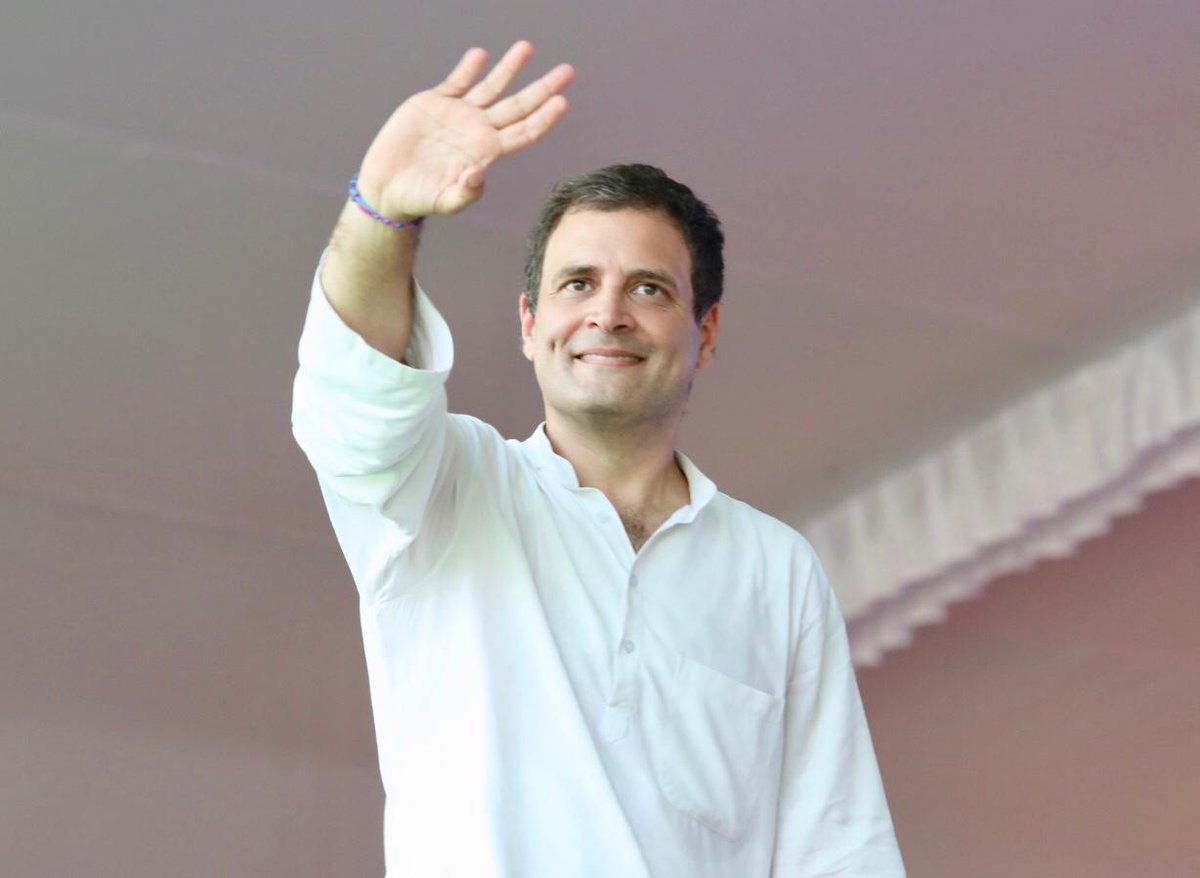

In [27]:
#lets verify the result by loading the image
from IPython.display import Image
Image(filename='dataset/single_prediction/test1.jpg')


**looks like our model predicted correctly**

In [30]:
# lets see on another image
def test_single_prediction(filename):
    test_image=image.load_img(filename,target_size=(64,64))
    #convert in to an 3D Array
    test_image=image.img_to_array(test_image)
    test_image.shape
    # our cnn model assigned batch size as dimesnion  so for that we are expanding its dimension
    test_image=np.expand_dims(test_image,axis=0)
    
    result=classifier.predict(test_image)
    if result[0][0]==1:
        prediction="Rahul Gandhi"
    if result[0][0]==0:
        prediction="Narendra Modi"
    return prediction

In [31]:
test_single_prediction("dataset/single_prediction/test1.jpg")

'Rahul Gandhi'

In [34]:
test_single_prediction("dataset/single_prediction/test2.jpg")

'Narendra Modi'

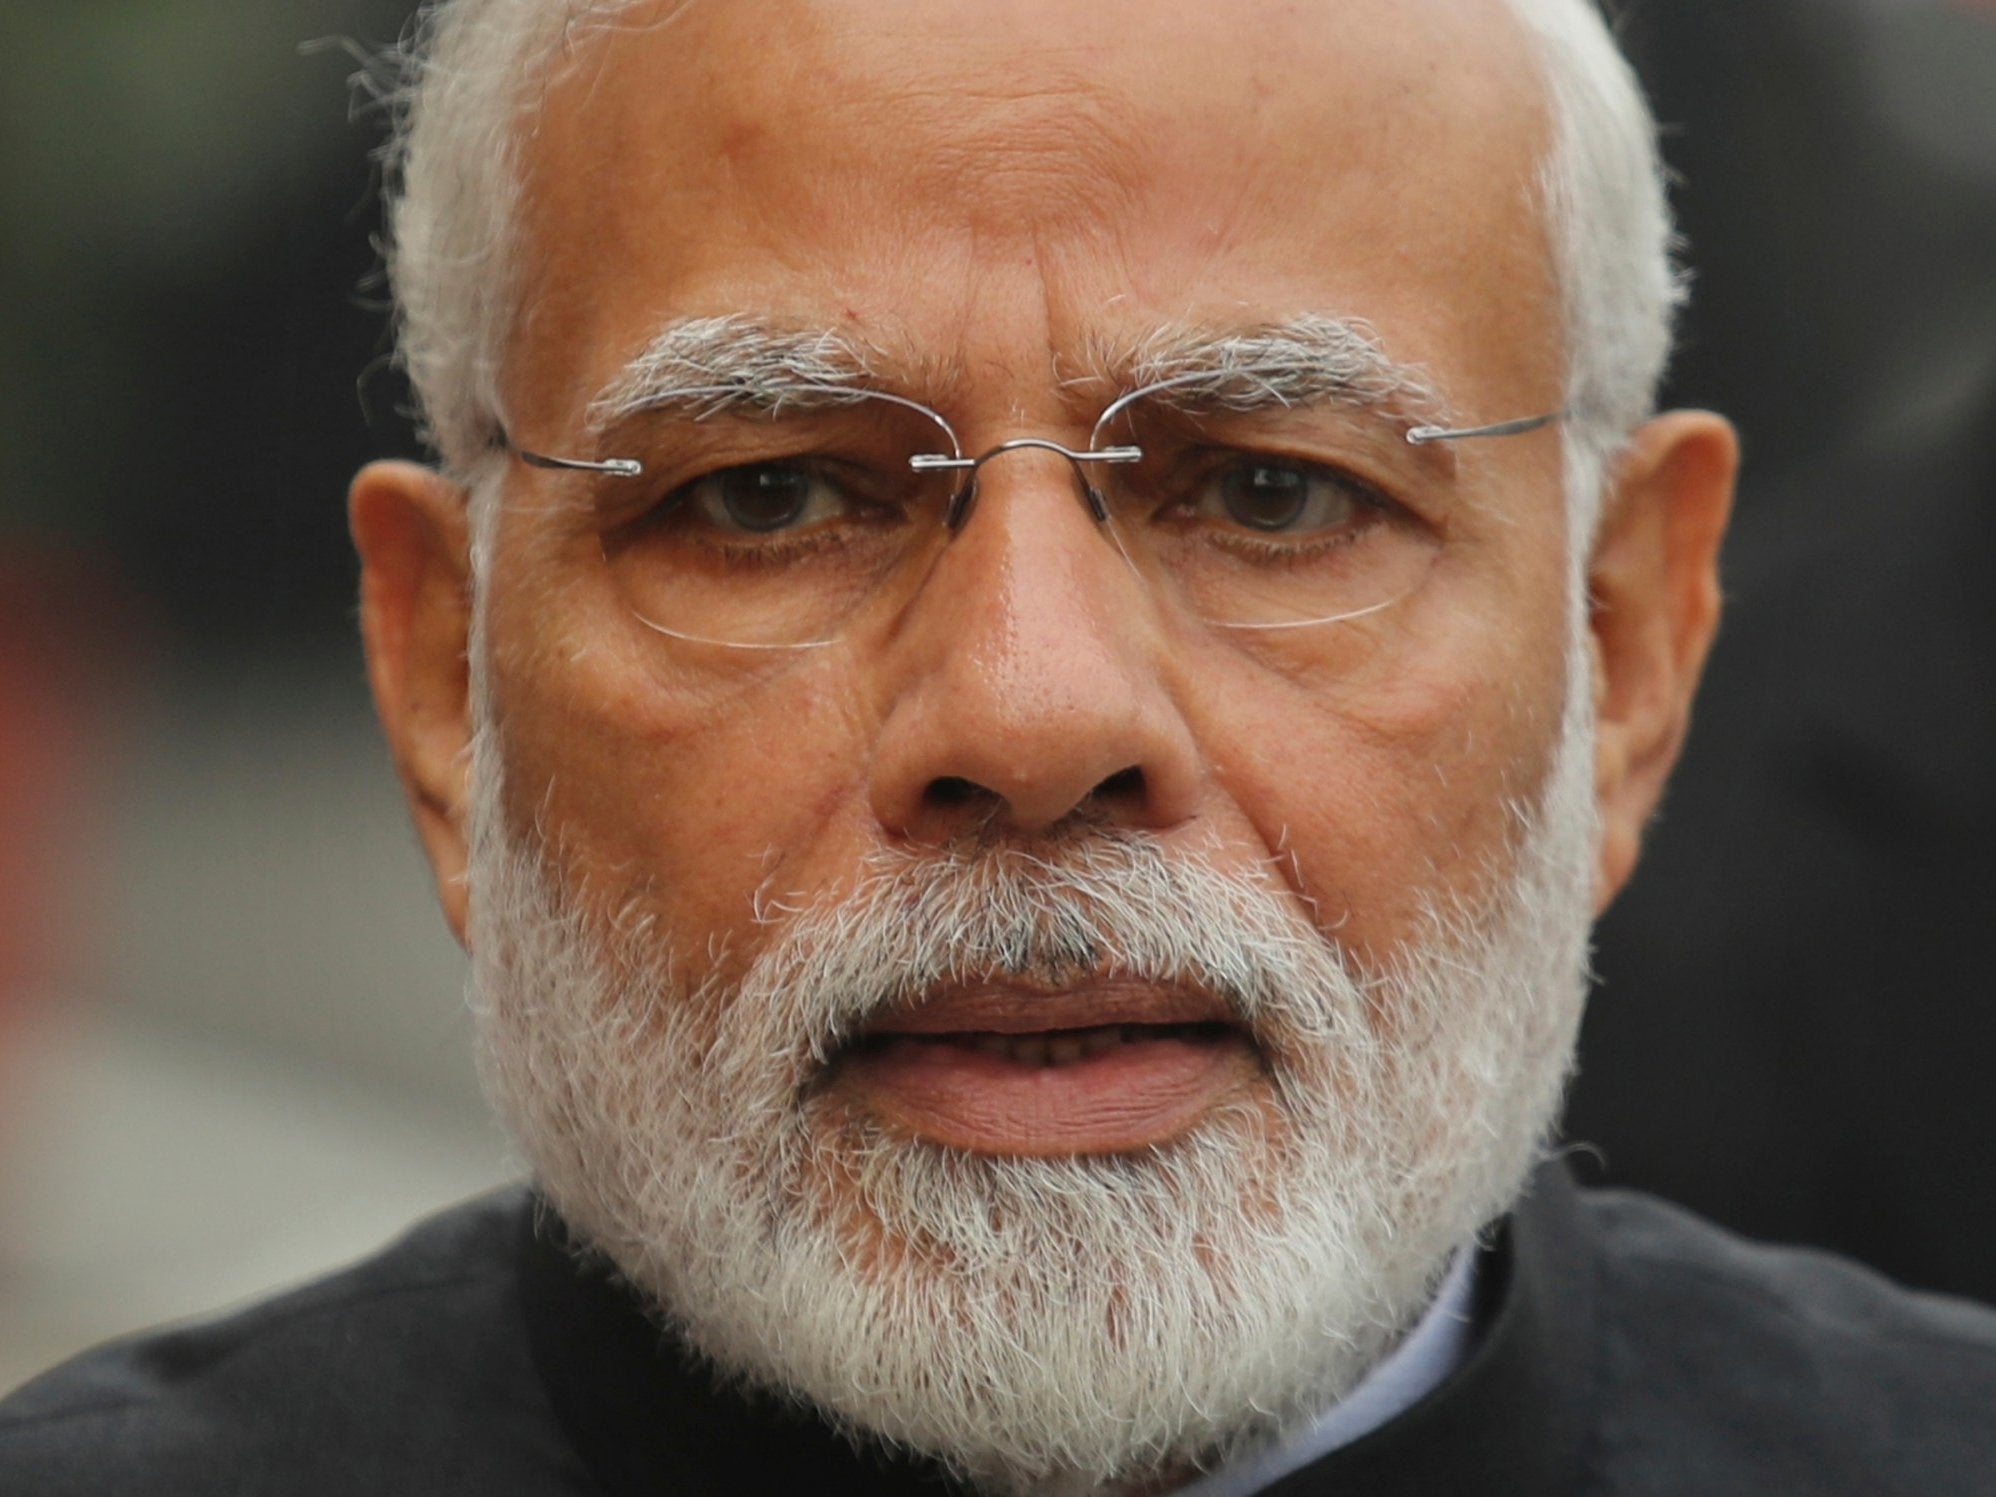

In [35]:
#lets verify the result by loading the image
from IPython.display import Image
Image(filename='dataset/single_prediction/test2.jpg')